In [21]:
pip install scipy numpy cliffs-delta pandas-ods-reader matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
from IPython.display import Markdown, display
from cliffs_delta import cliffs_delta
from scipy.stats import tukey_hsd
from pandas_ods_reader import read_ods

import collections
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu

In [23]:
path = "RawData.ods"

# Reading data from Group A - No IA during lab session
sheet_name = "Group A"
df_group_a = read_ods(path, sheet_name).to_numpy()

# Reading data from Group B - With IA during lab session
sheet_name = "Group B"
df_group_b = read_ods(path, sheet_name).to_numpy()

sheet_name = "General"
df_general = read_ods(path, sheet_name).to_numpy()

In [24]:
#Participant Statistics
age_mean = np.mean(df_general[:, 18])
age_mean = round(age_mean, 2)
semenster_mean = np.mean(df_general[:, 16])
semenster_mean = round(semenster_mean, 2)
dropout = 3
quant_male = np.count_nonzero(df_general[:, 15] == "Male")
quant_female = np.count_nonzero(df_general[:, 15] == "Female")
participants = quant_male+quant_female
gender_prop_male = quant_male/participants
gender_prop_male = round(gender_prop_male, 2)  
gender_prop_female = quant_female/participants
gender_prop_female = round(gender_prop_female, 2) 

# 4.1 Participant Background

We collected:
* Age
* Semester
* Gender

In [25]:
# Table 1
table_md = f"""
| Participants   | Age Mean   | Semester Mean    | Male         | Male Proportion    | Female         | Female Proportion    | Dropout    |
|----------------|------------|------------------|--------------|--------------------|----------------|----------------------|------------|
| {participants} | {age_mean} | {semenster_mean} | {quant_male} | {gender_prop_male} | {quant_female} | {gender_prop_female} | {dropout} |
"""

display(Markdown(table_md))


| Participants   | Age Mean   | Semester Mean    | Male         | Male Proportion    | Female         | Female Proportion    | Dropout    |
|----------------|------------|------------------|--------------|--------------------|----------------|----------------------|------------|
| 30 | 21.93 | 3.37 | 25 | 0.83 | 5 | 0.17 | 3 |


We collected:
* If they know GIA
* How often the use GIA
* How often they use GIA for programming activities

We also collected:
* know IA
* How frenquent they use is
* How frequent in programing.

In [26]:
#Collecting general data
#Column 11  - How many times do you use Genetive AI in a common day?
general_count = collections.Counter(df_general[:, 11])
general_data = []
general_labels = []
for key, value in general_count.items():
    general_labels.append(key)
    general_data.append(value)

#Column 13  - How often do you use generative AI in programming activities?
programinng_count = collections.Counter(df_general[:, 13])

programinng_data = []
programinng_labels = []
for key, value in programinng_count.items():
    programinng_labels.append(key)
    programinng_data.append(value)



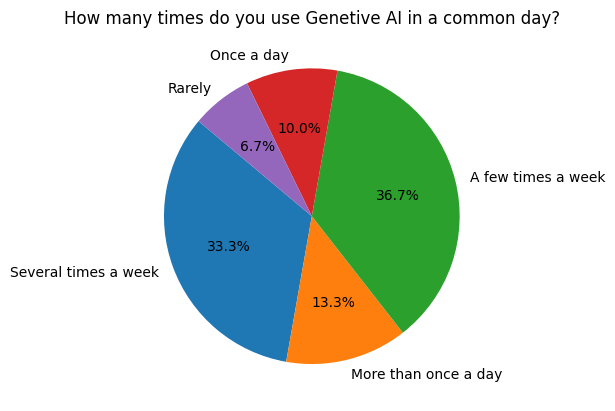

In [27]:
# How many times do you use Genetive AI in a common day?
plt.pie(general_data, labels=general_labels, autopct='%1.1f%%', startangle=140)
plt.title('How many times do you use Genetive AI in a common day?')
plt.show()

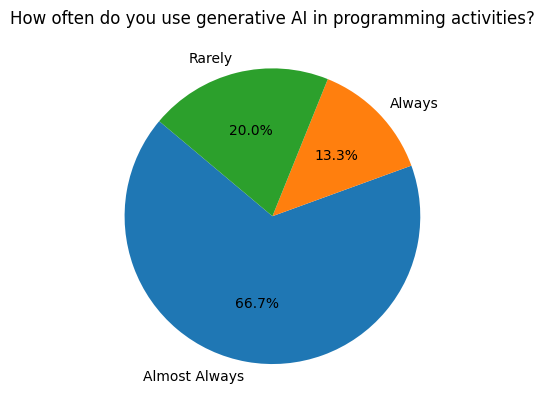

In [28]:
# How often do you use generative AI in programming activities?
plt.pie(programinng_data, labels=programinng_labels, autopct='%1.1f%%', startangle=140)
plt.title('How often do you use generative AI in programming activities?')
plt.show()

# Difference between groups

We calculate if there is diffence between the groups with pre-test.

In [29]:
n_group_a = np.count_nonzero(df_group_a[:, 2])
mean_group_a = round(np.mean(df_group_a[:, 2]), 3)
var_group_a = round(np.var(df_group_a[:, 2]), 3)
exame1_group_a = df_group_a[:, 2].tolist()

n_group_b = np.count_nonzero(df_group_b[:, 2])
mean_group_b = round(np.mean(df_group_b[:, 2]), 3)
var_group_b = round(np.var(df_group_b[:, 2]), 3)
exame1_group_b = df_group_b[:, 2].tolist()

U, p = mannwhitneyu(exame1_group_a, exame1_group_b, method="exact")
d, res = cliffs_delta(exame1_group_a, exame1_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [30]:
# Table 1
table_md = f"""
| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | {n_group_a} | {mean_group_a} | {var_group_a} | {U}          | {p}     | {d}          |{res}            |
| Group B  | {n_group_b} | {mean_group_b} | {var_group_b} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | 11 | 4.802 | 1.989 | 67          | 0.6092     | -0.12987          |negligible            |
| Group B  | 14 | 5.141 | 0.653 | -            | -       | -            | -               |


There is no difference or any result Cliffs-delta.

# ChatGPT and No-Chat GPT

We calculate if there is diffence between the groups with pre-test

In [31]:
column_exame_2 = 4

n_group_a = np.count_nonzero(df_group_a[:, column_exame_2])
mean_group_a = round(np.mean(df_group_a[:, column_exame_2]), 3)
var_group_a = round(np.var(df_group_a[:, column_exame_2]), 3)
exame2_group_a = df_group_a[:, column_exame_2].tolist()

n_group_b = np.count_nonzero(df_group_b[:, column_exame_2])
mean_group_b = round(np.mean(df_group_b[:, column_exame_2]), 3)
var_group_b = round(np.var(df_group_b[:, column_exame_2]), 3)
exame2_group_b = df_group_b[:, column_exame_2].tolist()

U, p = mannwhitneyu(exame2_group_a, exame2_group_b, method="exact")
d, res = cliffs_delta(exame2_group_a, exame2_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [32]:
# Table 1
table_md = f"""
| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | {n_group_a} | {mean_group_a} | {var_group_a} | {U}          | {p}     | {d}          |{res}            |
| Group B  | {n_group_b} | {mean_group_b} | {var_group_b} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | 11 | 5.022 | 1.747 | 97          | 0.29148     | 0.26623          |small            |
| Group B  | 14 | 4.592 | 0.797 | -            | -       | -            | -               |


We can see the effect but there is no difference using or not the IA.

# Group B - pre and pos-test comparison

We calculate if there is diffence between regarding group B pre and post-test

In [33]:
n_group_b1 = np.count_nonzero(df_group_b[:, 2])
mean_group_b1 = round(np.mean(df_group_b[:, 2]), 3)
var_group_b1 = round(np.var(df_group_b[:, 2]), 3)
exame1_group_b = df_group_b[:, 2].tolist()

n_group_b2 = np.count_nonzero(df_group_b[:, 4])
mean_group_b2 = round(np.mean(df_group_b[:, 4]), 3)
var_group_b2 = round(np.var(df_group_b[:, 4]), 3)
exame2_group_b = df_group_b[:, 4].tolist()

U, p = mannwhitneyu(exame1_group_b, exame2_group_b, method="exact")
d, res = cliffs_delta(exame1_group_b, exame2_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [34]:
# Table 1
table_md = f"""
| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group B-pre  | {n_group_b1} | {mean_group_b1} | {var_group_b1} | {U}          | {p}     | {d}          |{res}            |
| Group B-pos  | {n_group_b2} | {mean_group_b2} | {var_group_b2} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group B-pre  | 14 | 5.141 | 0.653 | 117          | 0.40126     | 0.19898          |small            |
| Group B-pos  | 14 | 4.592 | 0.797 | -            | -       | -            | -               |


We can see the effect but there is no difference using or not the IA.

# Group A - pre and pos-test comparison

We calculate if there is diffence between regarding group B pre and post-test

In [35]:
n_group_a1 = np.count_nonzero(df_group_a[:, 2])
mean_group_a1 = round(np.mean(df_group_a[:, 2]), 3)
var_group_a1 = round(np.var(df_group_a[:, 2]), 3)
exame1_group_a = df_group_a[:, 2].tolist()

n_group_a2 = np.count_nonzero(df_group_a[:, 4])
mean_group_a2 = round(np.mean(df_group_a[:, 4]), 3)
var_group_a2 = round(np.var(df_group_a[:, 4]), 3)
exame2_group_a = df_group_a[:, 4].tolist()

U, p = mannwhitneyu(exame1_group_a, exame2_group_a, method="exact")
d, res = cliffs_delta(exame1_group_a, exame2_group_a)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [36]:
# Table 1
table_md = f"""
| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group A-pre  | {n_group_a1} | {mean_group_a1} | {var_group_a1} | {U}          | {p}     | {d}          |{res}            |
| Group A-pos  | {n_group_a2} | {mean_group_a2} | {var_group_a2} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group A-pre  | 11 | 4.802 | 1.989 | 49          | 0.47785     | -0.19008          |small            |
| Group A-pos  | 11 | 5.022 | 1.747 | -            | -       | -            | -               |


# Group A and B - Mid-term exam

We calculate if there is diffence between regarding group B pre and post-test

In [37]:
column_exame_2 = 5

n_group_a = np.count_nonzero(df_group_a[:, column_exame_2])
mean_group_a = round(np.mean(df_group_a[:, column_exame_2]), 3)
var_group_a = round(np.var(df_group_a[:, column_exame_2]), 3)
exame2_group_a = df_group_a[:, column_exame_2].tolist()

n_group_b = np.count_nonzero(df_group_b[:, column_exame_2])
mean_group_b = round(np.mean(df_group_b[:, column_exame_2]), 3)
var_group_b = round(np.var(df_group_b[:, column_exame_2]), 3)
exame2_group_b = df_group_b[:, column_exame_2].tolist()

U, p = mannwhitneyu(exame2_group_a, exame2_group_b, method="exact")
d, res = cliffs_delta(exame2_group_a, exame2_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [38]:
# Table 1
table_md = f"""
| Groups       | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A      | {n_group_a} | {mean_group_a} | {var_group_a} | {U}          | {p}     | {d}          |{res}            |
| Group B      | {n_group_b} | {mean_group_b} | {var_group_b} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups       | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A      | 11 | 6.773 | 6.317 | 62          | 0.46682     | -0.18831          |small            |
| Group B      | 14 | 7.429 | 4.833 | -            | -       | -            | -               |


# Group A and B - MOSS exam

We calculate if there is diffence between regarding group B pre and post-test

In [39]:
column_exame_2 = 6

n_group_a = np.count_nonzero(df_group_a[:, column_exame_2])
mean_group_a = round(np.mean(df_group_a[:, column_exame_2]), 3)
max_group_a = np.max(df_group_a[:, column_exame_2])
min_group_a = np.min(df_group_a[:, column_exame_2])
var_group_a = round(np.var(df_group_a[:, column_exame_2]), 3)
exame2_group_a = df_group_a[:, column_exame_2].tolist()

n_group_b = np.count_nonzero(df_group_b[:, column_exame_2])
max_group_b = np.max(df_group_b[:, column_exame_2])
min_group_b = np.min(df_group_b[:, column_exame_2])
mean_group_b = round(np.mean(df_group_b[:, column_exame_2]), 3)
var_group_b = round(np.var(df_group_b[:, column_exame_2]), 3)
exame2_group_b = df_group_b[:, column_exame_2].tolist()

U, p = mannwhitneyu(exame2_group_a, exame2_group_b, method="exact")
d, res = cliffs_delta(exame2_group_a, exame2_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [40]:
# Table 1
table_md = f"""
| Groups       | N           | Min           | Max           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|-------------|---------------|---------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A      | {n_group_a} | {min_group_a} | {max_group_a} | {mean_group_a} | {var_group_a} | {U}          | {p}     | {d}          |{res}            |
| Group B      | {n_group_b} | {min_group_b} | {max_group_b} | {mean_group_b} | {var_group_b} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups       | N           | Min           | Max           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|-------------|---------------|---------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A      | 11 | 64.07 | 81.56 | 71.691 | 23.775 | 40          | 0.04423     | -0.48052          |large            |
| Group B      | 14 | 65.57 | 100.0 | 81.179 | 126.616 | -            | -       | -            | -               |
